### Stock Market Analysis

#### Author- Kirti Gupta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install pandas_profiling 
import itertools
import seaborn as sns
import pandas_profiling

In [3]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import GridSearchCV

C:\Users\kirti\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import Dataset

In [4]:
stock=pd.read_csv('F:/The Spark Foundation/^BSESN (2).csv')
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-08,20297.580078,20409.189453,20145.740234,20250.259766,20250.259766,15400.0
1,2010-10-11,20250.259766,20461.269531,20250.259766,20339.890625,20339.890625,11600.0
2,2010-10-12,20357.789063,20368.400391,20107.250000,20203.339844,20203.339844,13400.0
3,2010-10-13,20223.449219,20703.970703,20211.660156,20687.880859,20687.880859,14400.0
4,2010-10-14,20700.419922,20854.550781,20442.820313,20497.640625,20497.640625,15200.0
5,2010-10-15,20518.500000,20578.449219,20090.179688,20125.050781,20125.050781,9400.0
6,2010-10-18,20160.550781,20229.390625,19870.509766,20168.890625,20168.890625,12600.0
7,2010-10-19,20298.550781,20332.019531,19923.960938,19983.130859,19983.130859,12000.0
8,2010-10-20,19924.019531,20043.820313,19822.660156,19872.150391,19872.150391,10600.0
9,2010-10-21,19951.339844,20293.099609,19886.119141,20260.580078,20260.580078,12800.0


#### Data Cleaning

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2468 non-null   object 
 1   Open       2452 non-null   float64
 2   High       2452 non-null   float64
 3   Low        2452 non-null   float64
 4   Close      2452 non-null   float64
 5   Adj Close  2452 non-null   float64
 6   Volume     2452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


#### Data Audit

In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2.452000e+03
mean,27093.026806,27228.181945,26900.567822,27056.923361,27056.923361,1.431482e+05
std,7488.134669,7506.961228,7443.099733,7472.342600,7472.342600,1.508947e+06
min,15436.120117,15440.099609,15135.860352,15175.080078,15175.080078,2.500000e+03
25%,19712.367188,19790.575195,19570.274414,19681.437988,19681.437988,9.500000e+03
50%,26918.110351,27044.774414,26734.780274,26844.475586,26844.475586,1.200000e+04
75%,33691.931641,33866.032227,33487.449219,33693.464844,33693.464844,1.660000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [7]:
#Converting into Date Format
stock['Date']=pd.to_datetime(stock['Date'])

In [8]:
#Outlier Treatment
stock = stock.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [9]:
#stock.describe()

In [10]:
# Missing value imputation 
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode(
        ))
    return x

In [11]:
stock=stock.apply(missing_imputation)

In [12]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2468 non-null   datetime64[ns]
 1   Open       2468 non-null   float64       
 2   High       2468 non-null   float64       
 3   Low        2468 non-null   float64       
 4   Close      2468 non-null   float64       
 5   Adj Close  2468 non-null   float64       
 6   Volume     2468 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.1 KB


##### Assumption check for Linear Regression

C:\Users\kirti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


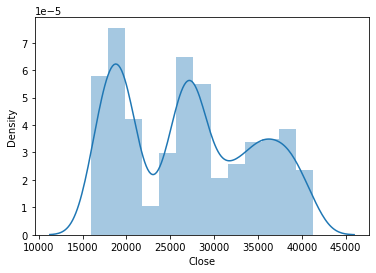

C:\Users\kirti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


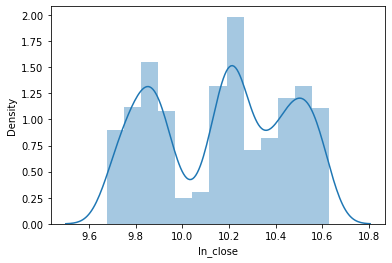

In [13]:
sns.distplot(stock.Close)
plt.show()
stock['ln_close']=np.log(stock['Close']+1)
sns.distplot(stock.ln_close)
plt.show()

In [14]:
stock.round(4)

,Date,Open,High,Low,Close,Adj Close,Volume,ln_close
0,2010-11-14 00:14:24,20297.5801,20409.1895,20145.7402,20250.2598,20250.2598,15400.0,9.9160
1,2010-11-14 00:14:24,20250.2598,20461.2695,20250.2598,20339.8906,20339.8906,11600.0,9.9204
2,2010-11-14 00:14:24,20357.7891,20368.4004,20107.2500,20203.3398,20203.3398,13400.0,9.9137
3,2010-11-14 00:14:24,20223.4492,20703.9707,20211.6602,20687.8809,20687.8809,14400.0,9.9374
4,2010-11-14 00:14:24,20700.4199,20854.5508,20442.8203,20497.6406,20497.6406,15200.0,9.9281
...,...,...,...,...,...,...,...,...
2463,2020-09-01 07:55:12,38068.8906,38236.3398,37828.1094,38067.9297,38067.9297,18400.0,10.5472
2464,2020-09-01 07:55:12,38410.1992,38738.8906,38410.1992,38697.0508,38697.0508,12900.0,10.5635
2465,2020-09-01 07:55:12,38956.7812,39263.8516,38819.8906,38973.6992,38973.6992,15500.0,10.5707
2466,2020-09-01 07:55:12,39336.3398,39623.7617,39191.1016,39574.5703,39574.5703,11300.0,10.5860


In [15]:
# correlation matrix
corrm = stock.corr()
#corrm.to_csv('corrm.csv')
corrm

,Open,High,Low,Close,Adj Close,Volume,ln_close
Open,1.000000,0.999740,0.999662,0.999411,0.999411,0.217972,0.992191
High,0.999740,1.000000,0.999499,0.999712,0.999712,0.220510,0.992483
Low,0.999662,0.999499,1.000000,0.999702,0.999702,0.215776,0.992549
Close,0.999411,0.999712,0.999702,1.000000,1.000000,0.218661,0.992815
Adj Close,0.999411,0.999712,0.999702,1.000000,1.000000,0.218661,0.992815
Volume,0.217972,0.220510,0.215776,0.218661,0.218661,1.000000,0.203832
ln_close,0.992191,0.992483,0.992549,0.992815,0.992815,0.203832,1.000000


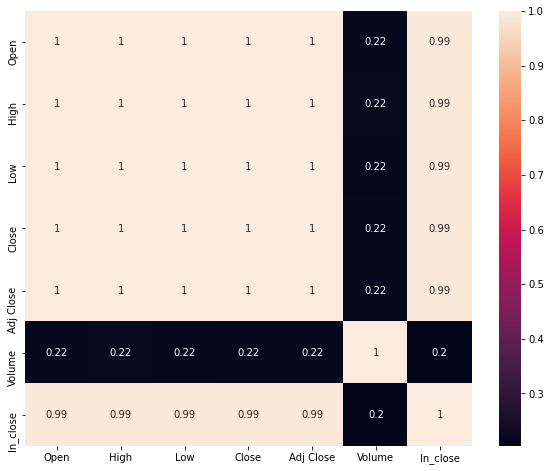

In [16]:
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(stock.corr(),annot=True)

In [17]:
stock.rename(columns={'Adj Close':'Adj_Close'},inplace=True)

#### Model Building

In [18]:
cols=['Adj_Close', 'High', 'Low', 'Open', 'Volume','Close','ln_close']

In [19]:
X=stock[cols]
Y=stock['ln_close']

In [20]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( X,
                                                  Y,
                                                  test_size = 0.10,
                                                  random_state = 123 )

#### 1. Linear Regression

In [21]:
train, test = train_test_split(stock[cols], test_size = 0.10, random_state = 56789)

In [22]:
# Step 1 and Step 2: define Y, X and build a ols model
lm1 = smf.ols('ln_close ~ Adj_Close+  High+ Low+ Open+ Volume', train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_close   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.080e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:15:55   Log-Likelihood:                 4396.1
No. Observations:                2221   AIC:                            -8780.
Df Residuals:                    2215   BIC:                            -8746.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1529      0.003   3378.295      0.0

C:\Users\kirti\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [23]:
# Step 4: prediction on the training data
train['pred'] = np.exp(lm1.predict(train))
train.head()

,Adj_Close,High,Low,Open,Volume,Close,ln_close,pred
1901,35548.261719,35721.550781,35518.730469,35698.429688,8100.0,35548.261719,10.478675,35893.188647
743,19895.099609,19921.380859,19647.880859,19880.939453,12300.0,19895.099609,9.898279,19887.749837
2108,39054.679688,39095.351563,38571.000000,38672.628906,15200.0,39054.679688,10.572744,40877.383379
303,15942.797373,16106.935322,15805.242666,15965.657519,12800.0,15942.797373,9.676825,17146.666613
1382,25653.230469,25688.460938,25351.619141,25528.800781,12900.0,25653.230469,10.152464,24699.216296


In [24]:
# Step 5: prediction on the testing/validation data
test['pred'] = np.exp(lm1.predict(test))
test.head()

,Adj_Close,High,Low,Open,Volume,Close,ln_close,pred
1868,35176.421875,35357.148438,35072.421875,35328.910156,8700.0,35176.421875,10.468160,35377.016003
1840,32996.761719,33102.738281,32810.859375,32876.480469,14600.0,32996.761719,10.404195,32568.923334
1164,27729.669922,27948.240234,27647.289063,27852.320313,9400.0,27729.669922,10.230294,26734.639794
461,17728.199219,17753.429688,17572.339844,17631.640625,10000.0,17728.199219,9.782968,18352.707538
89,18300.900391,18358.839844,18216.119141,18273.060547,18800.0,18300.900391,9.814760,18721.760534


In [25]:
# Step 6: accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train['Close'] - train['pred'])/train['Close'])

MAPE_test = np.mean(np.abs(test['Close'] - test['pred'])/test['Close'])

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.028657918729529042  |  MAPE of testing data:  0.02814725219424443


In [26]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred']
Actual_avg = train[['Deciles', 'Close']].groupby(train.Deciles).mean().sort_index(ascending = False)['Close']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred']
Actual_avg = test[['Deciles', 'Close']].groupby(test.Deciles).mean().sort_index(ascending = False)['Close']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [27]:
Decile_analysis_train

,Deciles,pred,Close
0,9,41533.156288,39476.919748
1,8,37072.950417,36503.721284
2,7,33414.299809,33717.725964
3,6,28981.771903,29886.344850
4,5,26680.260800,27692.337183
5,4,25282.384542,26252.306658
6,3,22474.121277,23071.714817
7,2,19819.530268,19780.691222
8,1,18856.551213,18466.186444
9,0,17734.990435,16841.300351


In [28]:
Decile_analysis_test

,Deciles,pred,Close
0,9,41603.145080,39533.544158
1,8,35634.291772,35381.874531
2,7,30972.937819,31669.864828
3,6,27504.718407,28498.702891
4,5,26009.109736,27011.530326
5,4,23210.356812,23941.562891
6,3,20337.824751,20457.047656
7,2,19477.551795,19313.503093
8,1,18705.079113,18265.926797
9,0,17665.352927,16742.045860


In [29]:
# Step 6: accuracy metrics (b. RMSE: Root Mean Squared Error)
RMSE_train = mean_squared_error(train.Close ,train.pred).round(3)
RMSE_test = mean_squared_error(test.Close ,test.pred).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  954507.807  |  RMSE of testing data:  945170.909


C:\Users\kirti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


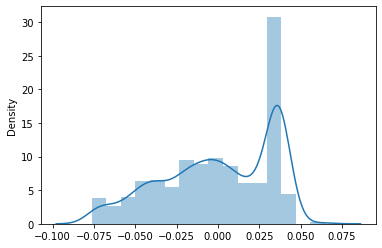

In [30]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm1.resid)
plt.show()

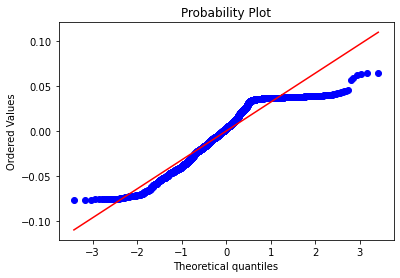

In [31]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(lm1.resid, dist = 'norm', plot = pylab)
pylab.show()

In [32]:
# assumption: mean of residuals/errors is zero
print(lm1.resid.mean())

-5.127280860127504e-14


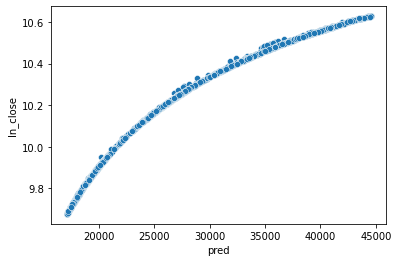

In [33]:
#!pip install --upgrade pip
#!pip install seaborn
import seaborn as sns
#sns.regplot(x=lm1.resid, y=train.Close)
#sns.jointplot(x=train.pred, y=train.ln_close)
sns.scatterplot(x=train.pred, y=train.ln_close)
plt.show()

### Machine Learning Approach

#### 1.Neural Network-ANN

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
# Now apply the transformations to the data:
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,train_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
predictions = mlp.predict(test_X)
predictions

array([ 9.7625649 , 10.628344  ,  9.73772713, 10.12942999, 10.63668309,
       10.3611273 , 10.1096714 ,  9.93431362, 10.429475  , 10.60668359,
       10.23488785,  9.86552612, 10.36447887, 10.39531004, 10.67143538,
       10.56240353, 10.44490929, 10.64248527, 10.12738372, 10.24624422,
       10.23999189, 10.20492611, 10.2771086 , 10.6600338 , 10.46676319,
       10.13852579,  9.82932985, 10.33963086,  9.87389878, 10.20020495,
        9.73583037, 10.250096  , 10.42659108, 10.23097641, 10.33523396,
       10.63421599,  9.63868957,  9.8531712 , 10.07324761,  9.90165766,
        9.94621879, 10.47386869, 10.38480955, 10.4336487 ,  9.82027136,
       10.62183206, 10.55825094,  9.97826343,  9.96184413, 10.20469237,
       10.45236696, 10.49809161,  9.66526114,  9.8846226 ,  9.80457702,
        9.88328847,  9.93878672, 10.50380158,  9.91734037, 10.03160134,
       10.16581436, 10.34875058,  9.60211491,  9.94216305, 10.40434402,
        9.73705075,  9.87552789, 10.50524188, 10.58431035,  9.94

In [39]:
#accuracy metrics: How the model is performing on test data
mse=mean_squared_error(test_y,predictions)
rmse=np.sqrt(mse)
rmse

0.07655493833458951

In [40]:
#how accurate a model is:train data-data is 91% accurate
mlp.score(train_X,train_y)

0.917239773464253

In [41]:
#how accurate a model is:test data
mlp.score(test_X,test_y)

0.9234586869029189

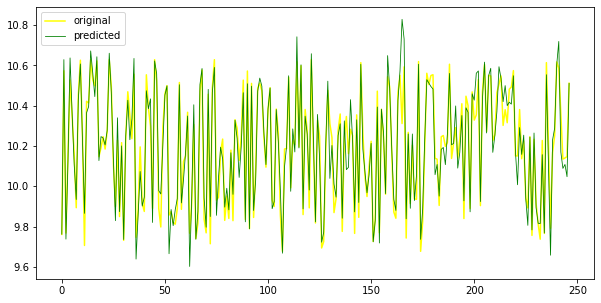

In [42]:
# Visualize the original and predicted test data in a plot to compare visually
plt.figure(figsize=(10,5))
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, color="yellow", label="original")
plt.plot(x_ax, mlp.predict(test_X), lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

#### 2. Linear Support Vector Reg Model-SVR

In [43]:
from sklearn.svm import LinearSVR

In [44]:
svm_reg = LinearSVR(random_state=0, tol=1e-5)
svm_reg.fit(train_X,train_y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

In [45]:
print(svm_reg.coef_)

[ 1.40951844e-05 -3.09793330e-05 -2.64843718e-05  2.95023068e-05
  2.62275775e-07  1.40951844e-05  2.81413346e-01]


In [46]:
print(svm_reg.intercept_)

[10.16356394]


In [47]:
print(svm_reg.predict(train_X))

[ 9.77022526 10.3517086   9.7479872  ... 10.40880861 10.21971861
 10.12477894]


In [48]:
from sklearn.pipeline import make_pipeline

model = SVR(kernel='linear')

In [49]:
model.fit(train_X,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
param_grid = {'C': [1, 5,10,20],
              'gamma': [0.0001, 0.001,0.005,0.01]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X,train_y)

C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.0001, 0.001, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [52]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [53]:
#Accuracy metrics
mse=mean_squared_error(test_y,yfit)
rmse=np.sqrt(mse)
rmse

0.062375507670135

In [54]:
#Accuracy score:train data- data is 95% accurate
model.score(train_X,train_y)

0.9511620672038557

In [55]:
#Accuracy score:test data
model.score(test_X,test_y)

0.9491866681004357

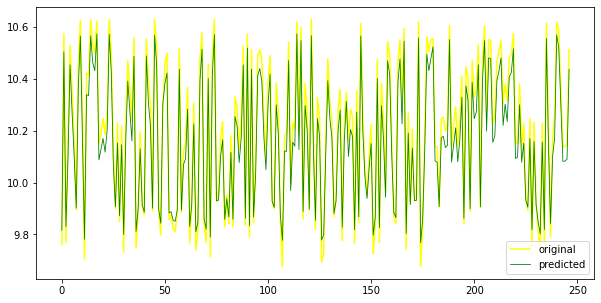

In [56]:
## Visualize the original and predicted test data in a plot to compare visually
plt.figure(figsize=(10,5))
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, color="yellow", label="original")
plt.plot(x_ax, model.predict(test_X), lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

#### 3.Xtreme Gradient Boosting Regressor

In [57]:
from xgboost import XGBRegressor

In [58]:
pargrid_xgbm = {'n_estimators': [150,200,250,300,350],
               'learning_rate': [10 ** x for x in range(-3, 1)]}

In [59]:
#from sklearn.model_selection import GridSearchCV
gscv_xgbm = GridSearchCV(estimator=XGBRegressor(), 
                        param_grid=pargrid_xgbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [60]:
gscv_xgbm.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_p

In [61]:
gscv_xgbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [62]:
xgbm = gscv_xgbm.best_estimator_

In [63]:
xgbm.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
xgbm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': xgbm.predict( test_X ) } )

In [65]:
xgbm_test_pred

,actual,predicted
476,9.761190,9.759887
2110,10.573067,10.573274
85,9.767899,9.767926
1266,10.158918,10.157919
2181,10.527509,10.527683
...,...,...
2357,10.364588,10.362299
917,10.134710,10.135805
1353,10.140252,10.140570
1284,10.147226,10.147716


In [66]:
#Accuracy score prediction
print(pd.Series(cross_val_score(xgbm, test_X, test_y, cv=10)).mean())

print(pd.Series(cross_val_score(xgbm, test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']])

0.9993864079651619
min     0.998607
mean    0.999386
max     0.999805
dtype: float64


In [67]:
#accuracy metrics
mse=mean_squared_error(test_y,xgbm.predict(test_X))
rmse=np.sqrt(mse)
rmse

0.0018007798180105675

In [68]:
#accuracy score-99% 
xgbm.score(train_X,train_y)

0.9999836810941827

In [69]:
xgbm.score(test_X,test_y)

0.999957648312846

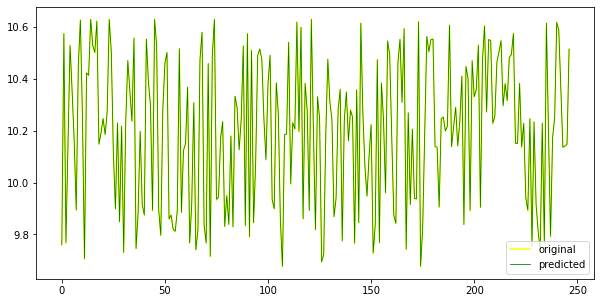

In [70]:
# Visualize the original and predicted test data in a plot to compare visually
plt.figure(figsize=(10,5))
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, color="yellow", label="original")
plt.plot(x_ax, xgbm.predict(test_X), lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

#### 4.Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
pargrid_rf = {'n_estimators': [30,40,50, 60, 70, 80],
                  'max_features': [1,2,3,4,5,6]}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.8s finished


In [73]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 70}

In [74]:
gscv_rf.best_score_

0.9999952352649586

In [75]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=40, max_features=5, n_jobs=-1)
radm_reg.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [76]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_reg.predict( test_X ) } )

In [77]:
radm_test_pred

,actual,predicted
476,9.761190,9.761776
2110,10.573067,10.572902
85,9.767899,9.767995
1266,10.158918,10.158853
2181,10.527509,10.527531
...,...,...
2357,10.364588,10.364446
917,10.134710,10.135068
1353,10.140252,10.139902
1284,10.147226,10.147070


In [78]:
#accuracy metrics
mse=mean_squared_error(test_y,radm_reg.predict(test_X))
rmse=np.sqrt(mse)
rmse

0.00046049485371672187

In [79]:
#accuracy score-99.9%
radm_reg.score(train_X,train_y)

0.9999991884470933

In [80]:
radm_reg.score(test_X,test_y)

0.9999972305148

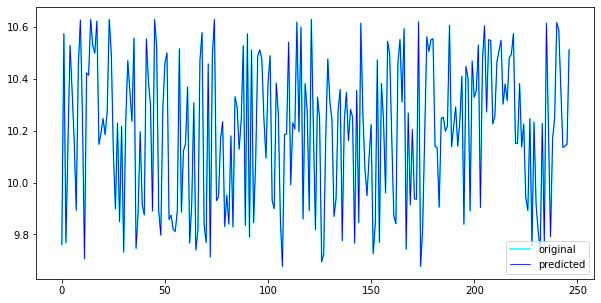

In [81]:
# Visualize the original and predicted test data in a plot to compare visually
plt.figure(figsize=(10,5))
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, color="cyan", label="original")
plt.plot(x_ax, radm_reg.predict(test_X), lw=0.8, color="blue", label="predicted")
plt.legend()
plt.show()

#### Voting Ensemble

In [89]:
from sklearn.ensemble import VotingRegressor

In [91]:
voting_reg = VotingRegressor(estimators = [ ('radm_reg',radm_reg), ('xgbm',xgbm),('mlp',mlp),('model',model)])
voting_reg.fit(train_X, train_y)

VotingRegressor(estimators=[('radm_reg',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=5,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=40, n_jobs=-1,
                                                   oob_score=True,
                                                   random_state=None, verbose=0,
             

In [94]:
#accuracy metrics
mse=mean_squared_error(test_y,voting_reg.predict(test_X))
rmse=np.sqrt(mse)
rmse

0.02080552996985948

In [93]:
print(voting_reg.score(test_X,test_y))

0.9943466346576141


##### We got best accuracy score by Random Forest Regressor.

### 2. Time Series Approach

In [137]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [138]:
stocks=pd.read_csv('F:/The Spark Foundation/^BSESN (2).csv')
stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-08,20297.580078,20409.189453,20145.740234,20250.259766,20250.259766,15400.0
1,2010-10-11,20250.259766,20461.269531,20250.259766,20339.890625,20339.890625,11600.0
2,2010-10-12,20357.789063,20368.400391,20107.250000,20203.339844,20203.339844,13400.0
3,2010-10-13,20223.449219,20703.970703,20211.660156,20687.880859,20687.880859,14400.0
4,2010-10-14,20700.419922,20854.550781,20442.820313,20497.640625,20497.640625,15200.0
5,2010-10-15,20518.500000,20578.449219,20090.179688,20125.050781,20125.050781,9400.0
6,2010-10-18,20160.550781,20229.390625,19870.509766,20168.890625,20168.890625,12600.0
7,2010-10-19,20298.550781,20332.019531,19923.960938,19983.130859,19983.130859,12000.0
8,2010-10-20,19924.019531,20043.820313,19822.660156,19872.150391,19872.150391,10600.0
9,2010-10-21,19951.339844,20293.099609,19886.119141,20260.580078,20260.580078,12800.0


In [139]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2468 non-null   object 
 1   Open       2452 non-null   float64
 2   High       2452 non-null   float64
 3   Low        2452 non-null   float64
 4   Close      2452 non-null   float64
 5   Adj Close  2452 non-null   float64
 6   Volume     2452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


In [140]:
stocks['Date']=pd.to_datetime(stocks['Date'])

In [141]:
stocks.dropna(inplace=True)

In [142]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2452 non-null   datetime64[ns]
 1   Open       2452 non-null   float64       
 2   High       2452 non-null   float64       
 3   Low        2452 non-null   float64       
 4   Close      2452 non-null   float64       
 5   Adj Close  2452 non-null   float64       
 6   Volume     2452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.2 KB


In [143]:
# Data Exploratory
stocks['Month']=stocks['Date'].dt.month
stocks['Year']=stocks['Date'].dt.year
stocks['Dayofweek']=stocks['Date'].dt.dayofweek

In [144]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
stocks.set_index('Date',inplace=True)

In [145]:
# extract out the time-series
prices=stocks.groupby('Date')['Close'].sum()
prices.head()

Date
2010-10-08    20250.259766
2010-10-11    20339.890625
2010-10-12    20203.339844
2010-10-13    20687.880859
2010-10-14    20497.640625
Name: Close, dtype: float64

Text(0, 0.5, 'Close')

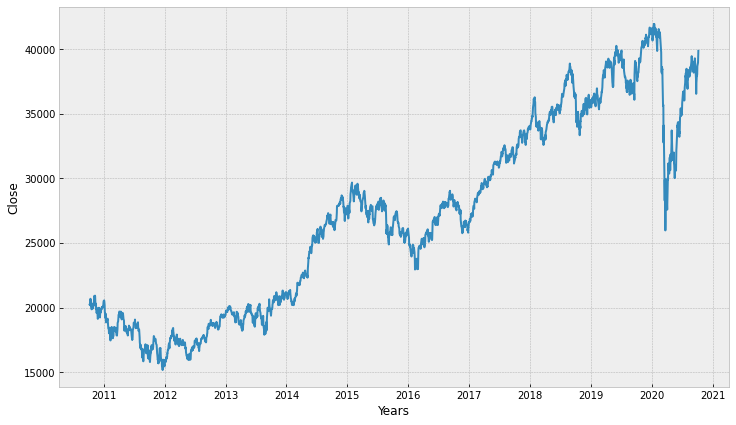

In [146]:
plt.figure(figsize=(12, 7))
plt.plot(prices)
plt.xlabel('Years')
plt.ylabel('Close')

In [147]:
price_mean=prices.rolling(window=12).mean().round(4)
price_std=prices.rolling(window=12).std().round(4)
print(price_mean,price_std)

Date
2010-10-08           NaN
2010-10-11           NaN
2010-10-12           NaN
2010-10-13           NaN
2010-10-14           NaN
                 ...    
2020-09-30    38131.2129
2020-10-01    38102.2712
2020-10-05    38074.8418
2020-10-06    38124.4017
2020-10-07    38210.4958
Name: Close, Length: 2452, dtype: float64 Date
2010-10-08         NaN
2010-10-11         NaN
2010-10-12         NaN
2010-10-13         NaN
2010-10-14         NaN
                ...   
2020-09-30    792.5970
2020-10-01    761.9716
2020-10-05    719.5689
2020-10-06    803.1892
2020-10-07    932.5083
Name: Close, Length: 2452, dtype: float64


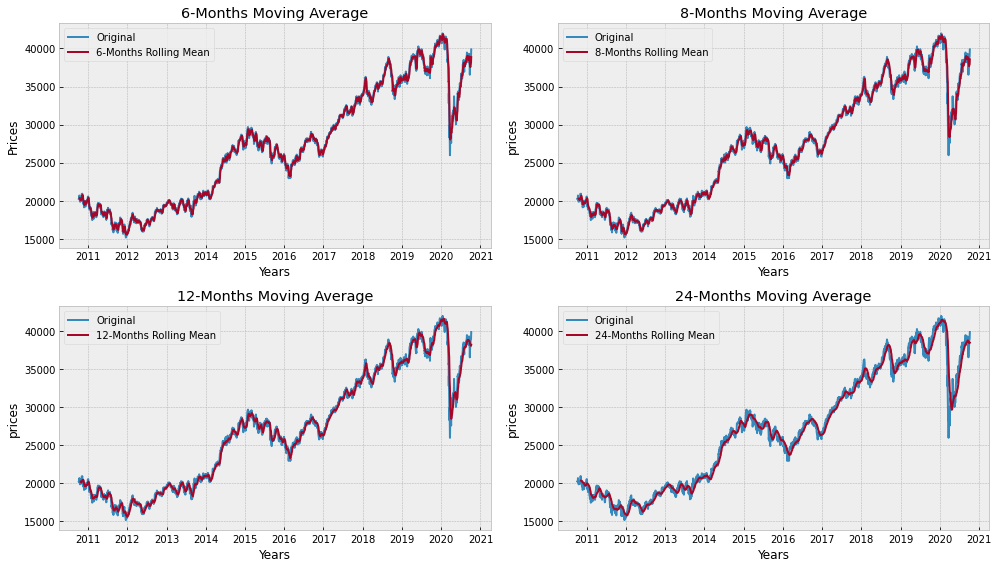

In [154]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(prices.index, prices, label='Original')
axes[0][0].plot(prices.index, prices.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel('Prices')
axes[0][0].set_title("6-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(prices.index, prices, label='Original')
axes[0][1].plot(prices.index, prices.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("prices")
axes[0][1].set_title("8-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(prices.index, prices, label='Original')
axes[1][0].plot(prices.index, prices.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("prices")
axes[1][0].set_title("12-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(prices.index, prices, label='Original')
axes[1][1].plot(prices.index, prices.rolling(window=24).mean(), label='24-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("prices")
axes[1][1].set_title("24-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

#### Step 1.2: Seasonality – Time Series Decomposition
The first thing to do is to see how prices vary on a month basis. We will plot a stacked annual plot to observe seasonality in our data

In [155]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year,Dayofweek
Date,,,,,,,,,
2010-10-08,20297.580078,20409.189453,20145.740234,20250.259766,20250.259766,15400.0,10,2010,4
2010-10-11,20250.259766,20461.269531,20250.259766,20339.890625,20339.890625,11600.0,10,2010,0
2010-10-12,20357.789063,20368.400391,20107.250000,20203.339844,20203.339844,13400.0,10,2010,1
2010-10-13,20223.449219,20703.970703,20211.660156,20687.880859,20687.880859,14400.0,10,2010,2
2010-10-14,20700.419922,20854.550781,20442.820313,20497.640625,20497.640625,15200.0,10,2010,3


In [156]:
monthly_price = pd.pivot_table(stocks, values = "Close", columns = "Year", index = "Month")
monthly_price = monthly_price.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_price

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,
1,NaN,19288.540918,16381.793992,19888.013139,20943.422724,28256.509571,24706.951892,27165.459356,34989.415306,36043.835760,41363.444247
2,NaN,18036.618457,17836.327441,19463.736426,20521.340563,28931.355777,23688.301432,28457.402138,34287.038446,36143.826480,40723.734170
3,NaN,18456.853338,17405.350726,19147.178248,21818.734473,28541.532459,24811.954102,29269.491300,33323.319696,37577.292318,32254.451358
4,NaN,19450.140517,17287.995683,18815.776465,22569.499349,28112.723787,25441.466688,29695.834527,34145.676711,38861.476357,30966.008572
5,NaN,18325.450373,16396.231002,19960.801314,23745.902902,27426.526660,25693.691850,30420.066939,35079.555930,38574.599965,31294.248458
6,NaN,18228.935813,16737.144020,19129.289453,25226.808222,27137.880149,26717.735707,31144.678572,35405.144903,39538.369038,34262.875178
7,NaN,18616.407552,17210.194158,19709.714334,25723.457475,28015.599525,27713.407324,31879.607236,36406.377486,38649.970788,37030.641474
8,NaN,16887.525809,17581.561570,18641.414356,26057.962582,27386.862072,28006.898970,31772.229167,38061.525298,37149.346485,38346.588170
9,NaN,16694.772740,18145.071443,19627.233203,26910.518466,25705.373535,28502.546875,31887.121466,37397.496962,37545.056538,38378.977806


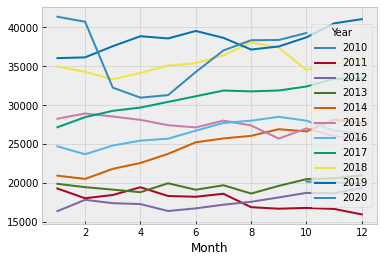

In [164]:
monthly_price.plot()

#### Important Inferences
Jan,Feb and October are the peak months for prices and the variance and the mean value in Jan,Feb and October are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a decreasing trend in the beginning of the year and increases towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

###  Timeseries Forecasting using FBProphet

In [260]:
#!conda  install -c conda-forge fbprophet --yes
#!pip install fbprophet
from fbprophet import Prophet #you need to install fbprophet using pip install

In [261]:
stocks=stocks.groupby('Date')[['Close']].sum()

In [262]:
stocks['ds'] = stocks.index

In [263]:
stocks.head()

,Close,ds
Date,,
2010-10-08,20250.259766,2010-10-08
2010-10-11,20339.890625,2010-10-11
2010-10-12,20203.339844,2010-10-12
2010-10-13,20687.880859,2010-10-13
2010-10-14,20497.640625,2010-10-14


In [264]:
stocks = stocks[['ds', 'Close']].rename(columns={'ds': 'ds', 'Close': 'y'})

In [265]:
price_model = Prophet(seasonality_mode='additive',interval_width=0.95)
price_model.fit(stocks)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [266]:
price_forecast = price_model.make_future_dataframe(periods=36, freq='MS')
price_forecast = price_model.predict(price_forecast)

In [267]:
price_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-10-08,20234.685779,17489.075934,23040.238976,20234.685779,20234.685779,-5.512821,-5.512821,-5.512821,14.925002,14.925002,14.925002,-20.437823,-20.437823,-20.437823,0.0,0.0,0.0,20229.172958
1,2010-10-11,20206.973149,17396.108915,23313.162535,20206.973149,20206.973149,-20.466301,-20.466301,-20.466301,10.173227,10.173227,10.173227,-30.639528,-30.639528,-30.639528,0.0,0.0,0.0,20186.506848
2,2010-10-12,20197.735605,17310.563312,23095.163345,20197.735605,20197.735605,-26.928222,-26.928222,-26.928222,0.752455,0.752455,0.752455,-27.680677,-27.680677,-27.680677,0.0,0.0,0.0,20170.807383
3,2010-10-13,20188.498062,17339.620339,23174.803229,20188.498062,20188.498062,-41.651463,-41.651463,-41.651463,-20.139323,-20.139323,-20.139323,-21.512140,-21.512140,-21.512140,0.0,0.0,0.0,20146.846599
4,2010-10-14,20179.260518,17548.598915,23203.076865,20179.260518,20179.260518,29.586672,29.586672,29.586672,41.788003,41.788003,41.788003,-12.201331,-12.201331,-12.201331,0.0,0.0,0.0,20208.847190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2023-06-01,36951.655610,21749.124618,52525.751420,21136.963342,52747.653455,-103.366562,-103.366562,-103.366562,41.788003,41.788003,41.788003,-145.154565,-145.154565,-145.154565,0.0,0.0,0.0,36848.289048
2484,2023-07-01,36947.044498,20222.682183,53305.657326,20484.259728,53364.972716,175.544654,175.544654,175.544654,-23.749677,-23.749677,-23.749677,199.294331,199.294331,199.294331,0.0,0.0,0.0,37122.589152
2485,2023-08-01,36942.279682,20246.444718,53883.299977,19640.734275,54036.405393,545.902872,545.902872,545.902872,0.752455,0.752455,0.752455,545.150417,545.150417,545.150417,0.0,0.0,0.0,37488.182554
2486,2023-09-01,36937.514867,18032.093881,55168.049867,18777.648350,55044.156733,251.445438,251.445438,251.445438,14.925002,14.925002,14.925002,236.520436,236.520436,236.520436,0.0,0.0,0.0,37188.960305


##### Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

<Figure size 1296x432 with 0 Axes>

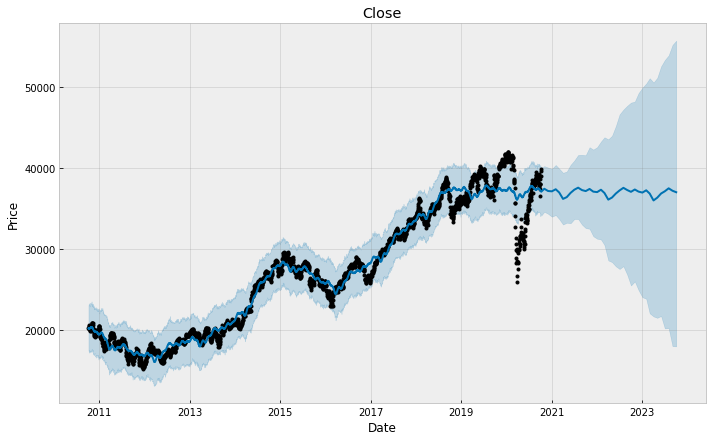

In [268]:
plt.figure(figsize=(18, 6))
price_model.plot(price_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Close');

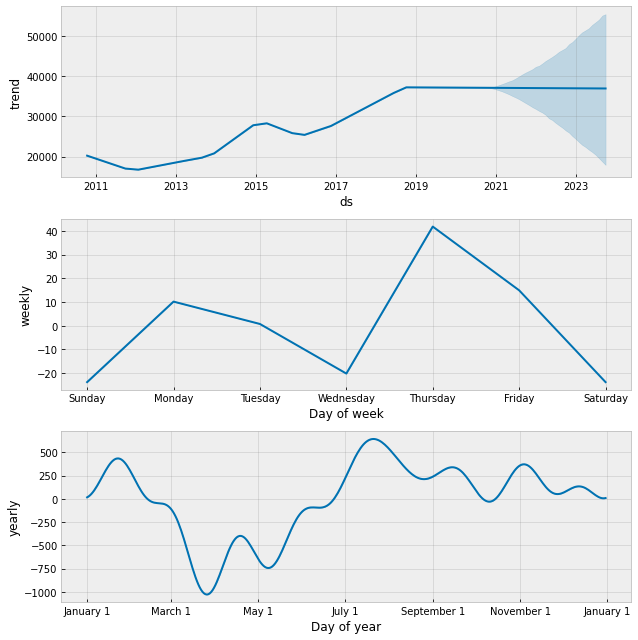

In [269]:
price_model.plot_components(price_forecast);

##### There is a lot of fluctuation in prices over a period time 

The worst months for market are April,May,June. The best months for markets are Feb,August and November.

## Stationary Data for ARIMA models
Dickey-Fuller Test

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [270]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(prices)

(-0.6816336592944717,
 0.8514496520589261,
 12,
 2439,
 {'1%': -3.4330339670691994,
  '5%': -2.8627257493596634,
  '10%': -2.5674012225098473},
 34573.41579450371)

In [271]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.681634
p-value                           0.851450
#lags Used                       12.000000
Number of Observations Used    2439.000000
Critical Value (1%)              -3.433034
Critical Value (5%)              -2.862726
Critical Value (10%)             -2.567401
dtype: float64


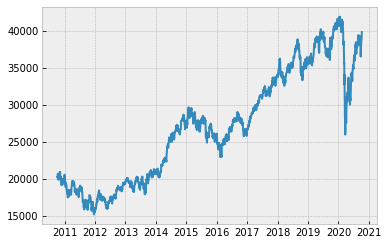

In [165]:
plt.plot(prices)

In [166]:
prices_log = np.log10(prices)

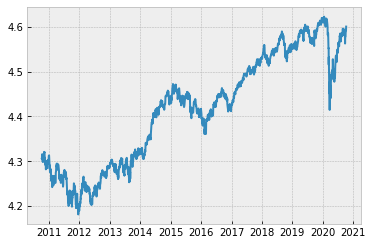

In [167]:
plt.plot(prices_log)

In [275]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.654438
p-value                           0.858201
#lags Used                       12.000000
Number of Observations Used    2439.000000
Critical Value (1%)              -3.433034
Critical Value (5%)              -2.862726
Critical Value (10%)             -2.567401
dtype: float64


In [276]:
prices.diff(1).head()

Date
2010-10-08           NaN
2010-10-11     89.630859
2010-10-12   -136.550781
2010-10-13    484.541015
2010-10-14   -190.240234
Name: Close, dtype: float64

In [277]:
prices_diff1 = prices.diff(1)
prices_diff1.dropna(inplace=True)

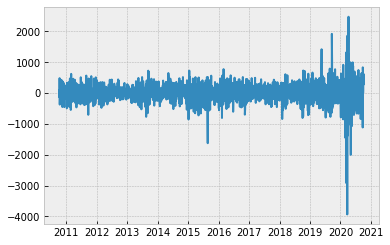

In [278]:
plt.plot(prices_diff1)

In [279]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.306393e+01
p-value                        2.020594e-24
#lags Used                     1.100000e+01
Number of Observations Used    2.439000e+03
Critical Value (1%)           -3.433034e+00
Critical Value (5%)           -2.862726e+00
Critical Value (10%)          -2.567401e+00
dtype: float64


In [280]:
prices_log_diff1 = prices_log.diff(1)
prices_log_diff1.dropna(inplace=True)

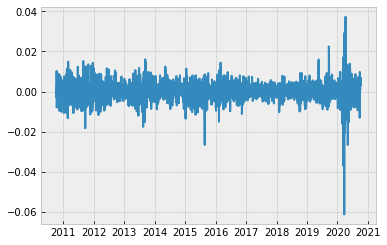

In [281]:
plt.plot(prices_log_diff1)

In [282]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.385974e+01
p-value                        6.763873e-26
#lags Used                     1.100000e+01
Number of Observations Used    2.439000e+03
Critical Value (1%)           -3.433034e+00
Critical Value (5%)           -2.862726e+00
Critical Value (10%)          -2.567401e+00
dtype: float64


In [283]:
prices_log_diff2 = prices_log.diff(2)
prices_log_diff2.dropna(inplace=True)

In [284]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.022255e+01
p-value                        5.278259e-18
#lags Used                     2.700000e+01
Number of Observations Used    2.422000e+03
Critical Value (1%)           -3.433053e+00
Critical Value (5%)           -2.862734e+00
Critical Value (10%)          -2.567406e+00
dtype: float64


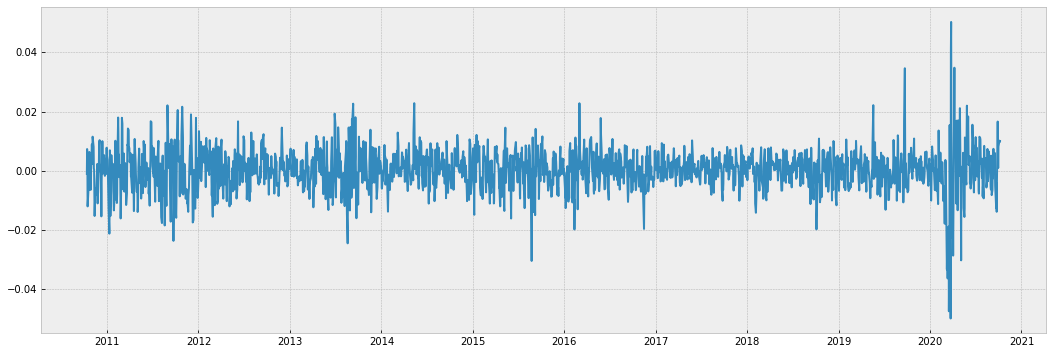

In [285]:
plt.figure(figsize=(18, 6))
plt.plot(prices_log_diff2)

In [169]:
prices_log_diff3 = prices_log.diff(3)
prices_log_diff3.dropna(inplace=True)

In [170]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(prices_log_diff3)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -9.210337e+00
p-value                        1.895281e-15
#lags Used                     2.700000e+01
Number of Observations Used    2.421000e+03
Critical Value (1%)           -3.433054e+00
Critical Value (5%)           -2.862735e+00
Critical Value (10%)          -2.567406e+00
dtype: float64


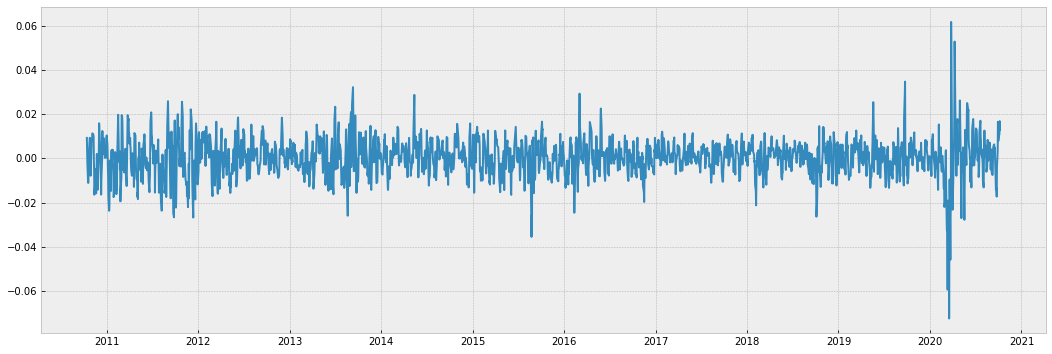

In [171]:
plt.figure(figsize=(18, 6))
plt.plot(prices_log_diff3)

### ARIMA Modeling

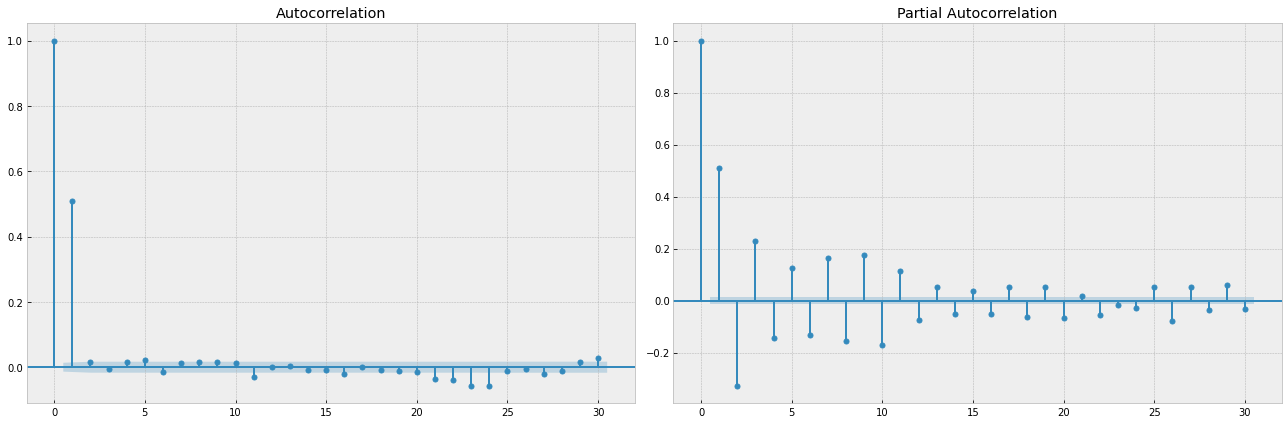

In [286]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(prices_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(prices_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

##### Identification of best fit ARIMA model

In [287]:
model = sm.tsa.statespace.SARIMAX(prices_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [288]:
results = model.fit()

In [289]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 2450
Model:             SARIMAX(1, 0, 1)x(1, 0, 0, 12)   Log Likelihood                9530.078
Date:                            Tue, 13 Oct 2020   AIC                         -19052.157
Time:                                    15:53:25   BIC                         -19028.963
Sample:                                         0   HQIC                        -19043.725
                                           - 2450                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0102      0.012      0.877      0.380      -0.013       0.033
ma.L1          1.0000      1.929   

#### Iterate the process to find the best values for p, d, q and P, D, Q¶

In [290]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [291]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [292]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [293]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [294]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(prices_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 model - AIC:-19168.751147456653


####  Predict prices on in-sample date using the best fit ARIMA model
The next step is to predict price for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [172]:
best_model = sm.tsa.statespace.SARIMAX(prices_log,
                                      order=(1, 0, 0),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

C:\Users\kirti\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [173]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 2452
Model:               SARIMAX(1, 0, 0)   Log Likelihood                9586.376
Date:                Thu, 15 Oct 2020   AIC                         -19168.751
Time:                        17:54:49   BIC                         -19157.143
Sample:                             0   HQIC                        -19164.532
                               - 2452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.29e-05   4.37e+04      0.000       1.000       1.000
sigma2      2.346e-05   2.26e-07    103.797      0.000     2.3e-05    2.39e-05


In [297]:
prices

Date
2010-10-08    20250.259766
2010-10-11    20339.890625
2010-10-12    20203.339844
2010-10-13    20687.880859
2010-10-14    20497.640625
                  ...     
2020-09-30    38067.929688
2020-10-01    38697.050781
2020-10-05    38973.699219
2020-10-06    39574.570313
2020-10-07    39878.949219
Name: Close, Length: 2452, dtype: float64

In [298]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2020-09-30'), full_results=True)

In [299]:
pred_dynamic.predicted_mean

Date
2020-09-30    4.579600
2020-10-01    4.580682
2020-10-05    4.587801
2020-10-06    4.590895
2020-10-07    4.597539
dtype: float64

In [300]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [301]:
actual = prices['2020-09-30':]
actual

Date
2020-09-30    38067.929688
2020-10-01    38697.050781
2020-10-05    38973.699219
2020-10-06    39574.570313
2020-10-07    39878.949219
Name: Close, dtype: float64

In [302]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [303]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0095


In [304]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 178766.1797
The ROOT Mean Squared Error of our forecasts is 422.8074972135665


In [305]:
np.power(10, best_results.forecast(steps=12))

2452    39890.277315
2453    39901.608933
2454    39912.944073
2455    39924.282738
2456    39935.624928
2457    39946.970644
2458    39958.319888
2459    39969.672661
2460    39981.028964
2461    39992.388798
2462    40003.752164
2463    40015.119064
dtype: float64

#### Forecast prices using the best fit ARIMA model
The next step is to predict prices for next 3 years i.e. for 2021, 2022, and 2023 through the above model.

In [306]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [307]:
pred_ci_99.head()

,lower Close,upper Close
2452,4.591374,4.610360
2453,4.587565,4.614415
2454,4.584671,4.617556
2455,4.582251,4.620223
2456,4.580133,4.622588


In [308]:
pred_ci_95.head()

,lower Close,upper Close
2452,4.591374,4.610360
2453,4.587565,4.614415
2454,4.584671,4.617556
2455,4.582251,4.620223
2456,4.580133,4.622588


In [309]:
n_steps = 36
idx = pd.date_range(prices.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [310]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2020-11-01,39890.277315,39027.817215,40771.796576
2020-12-01,39901.608933,38687.030070,41154.319484
2021-01-01,39912.944073,38430.083015,41453.022726
2021-02-01,39924.282738,38216.487880,41708.394480
2021-03-01,39935.624928,38030.568342,41936.111078


In [311]:
fc_99.head()

,lower_ci_99,upper_ci_99
2020-11-01,39027.817215,40771.796576
2020-12-01,38687.030070,41154.319484
2021-01-01,38430.083015,41453.022726
2021-02-01,38216.487880,41708.394480
2021-03-01,38030.568342,41936.111078


In [312]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2020-11-01,39890.277315,39027.817215,40771.796576,39027.817215,40771.796576
2020-12-01,39901.608933,38687.030070,41154.319484,38687.030070,41154.319484
2021-01-01,39912.944073,38430.083015,41453.022726,38430.083015,41453.022726
2021-02-01,39924.282738,38216.487880,41708.394480,38216.487880,41708.394480
2021-03-01,39935.624928,38030.568342,41936.111078,38030.568342,41936.111078


In [313]:
pd.plotting.register_matplotlib_converters()

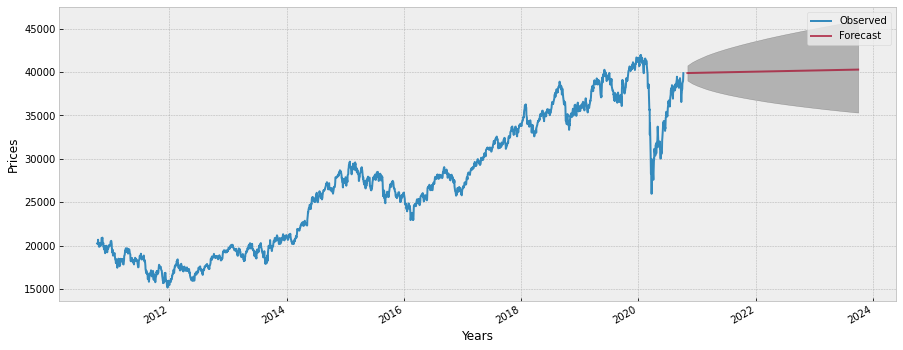

In [314]:
# plot the forecast along with the confidence band
axis = prices.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Prices')
plt.legend(loc='best')
plt.show()

##### with 95% of confidence, there would be a fall in stock market in 2021.

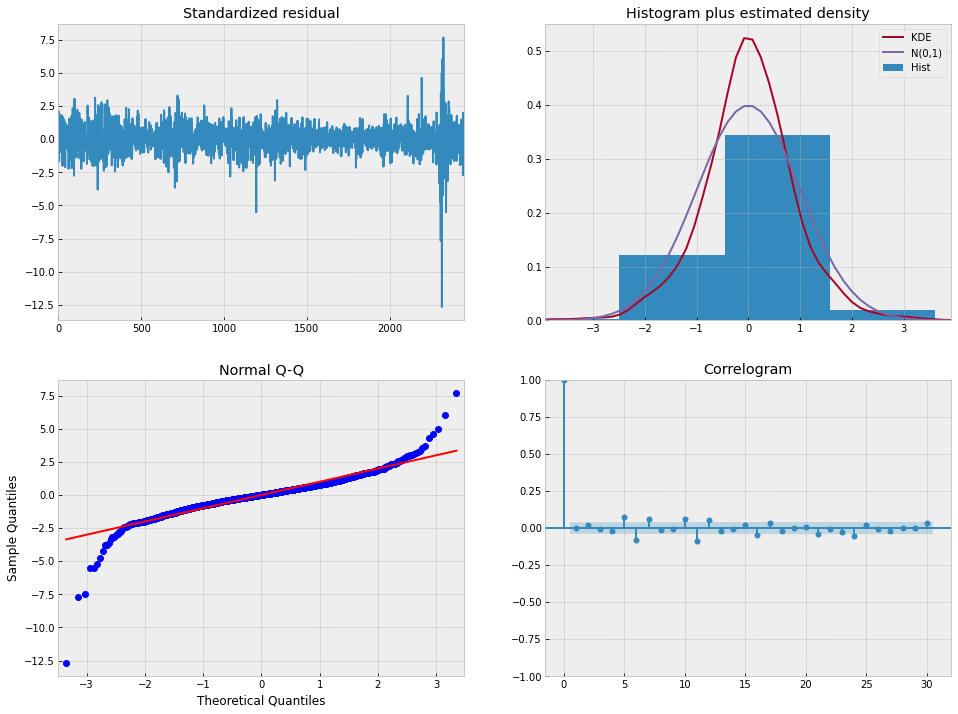

In [315]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

### Single Exponential Smoothing

In [339]:
### single exponential smoothing/ ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(prices, trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
ets_fit = ets_model.fit(optimized=True)

In [340]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

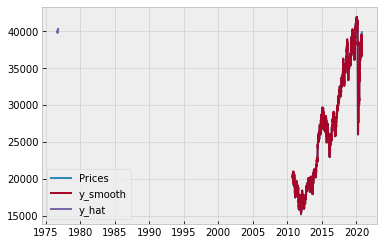

In [341]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(prices, label='Prices')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()